# Autoregressive Model
- TUTORIAL: [Predicting Stock Prices and Making \$\$\$ Using the ARMA Model](https://youtu.be/Vyr5dthe-2s?t=84) by ritvikmath via YouTube
- Before I place model in [main.ipynb](https://github.com/Brinkley97/applied_time_series_and_machine_learning/blob/main/play/main.ipynb)

# Imports

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import yfinance as yf

from matplotlib import pyplot

from statsmodels.tsa.ar_model import AutoReg

# test for stationarity
from statsmodels.tsa.stattools import adfuller

# partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.graphics.tsaplots as tsa

from sklearn.metrics import mean_squared_error, max_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
ticker_symbol = "AAPL"
# symbol = "BRK-A"
start_date = "2021-01-01"
end_date = "2021-04-01"
voo_df = yf.download(ticker_symbol, start=start_date, end=end_date)
voo_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.503624,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.080063,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.735031,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.991409,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.104736,105158200
...,...,...,...,...,...,...
2021-03-25,119.540001,121.660004,119.000000,120.589996,118.991112,98844700
2021-03-26,120.349998,121.480003,118.919998,121.209999,119.602875,94071200
2021-03-29,121.650002,122.580002,120.730003,121.389999,119.780495,80819200


In [3]:
# voo_df = pd.read_csv("../../datasets/VOO_DAILY.csv")

<AxesSubplot: xlabel='Date'>

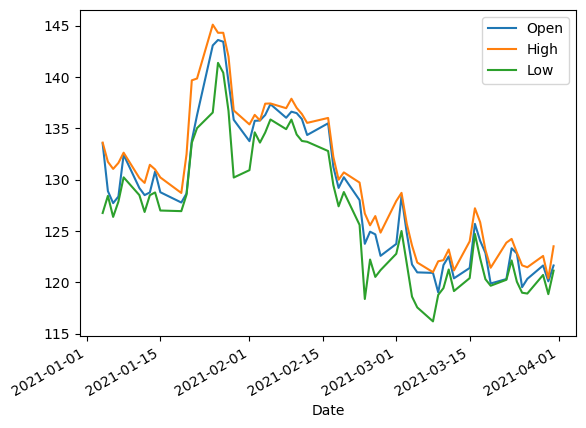

In [4]:
voo_df.loc[:, ['Open', 'High', 'Low']].plot()

<AxesSubplot: xlabel='Date'>

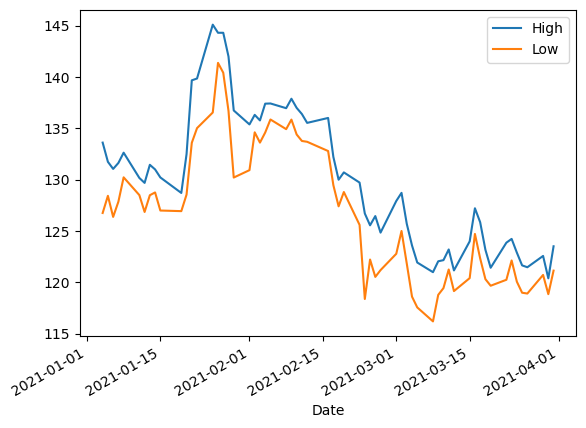

In [5]:
voo_df.loc[:, ['High', 'Low']].plot()

In [6]:
open_voo_df = voo_df['Open']
open_voo_df

Date
2021-01-04    133.520004
2021-01-05    128.889999
2021-01-06    127.720001
2021-01-07    128.360001
2021-01-08    132.429993
                 ...    
2021-03-25    119.540001
2021-03-26    120.349998
2021-03-29    121.650002
2021-03-30    120.110001
2021-03-31    121.650002
Name: Open, Length: 61, dtype: float64

In [7]:
# open_voo_df.plot()

Text(0, 0.5, 'Prices')

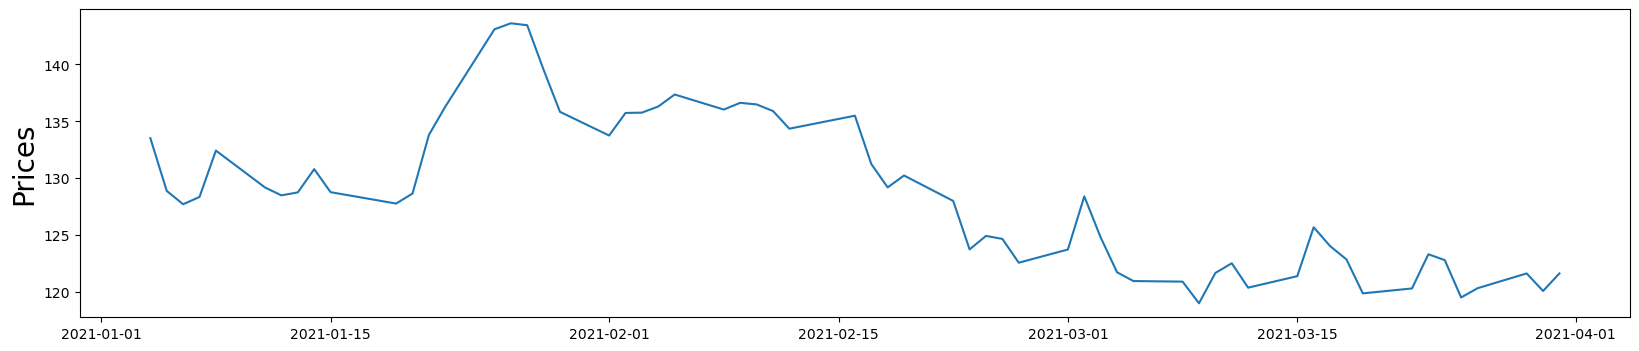

In [8]:
pyplot.figure(figsize=(20, 4))
pyplot.plot(open_voo_df)
pyplot.ylabel('Prices', fontsize=20)

# Returns

- Forecast returns
- Why: To have more stationarity compared to the prices (open) which may NOT have stationarity
- Calculate with the `percent change` between $ z_{t-1} $ and $ z_t $
    - If `percent change` < 0, then stock price is going down, hence a loss from $ z_{t-1} \rightarrow z_t $
    - If `percent change` > 0, then stock price is going up, hence a gain from $ z_{t-1} \rightarrow z_t $
    - If `percent change` = 0, then stock price is constant, hence a no loss nor no gain from $ z_{t-1} \rightarrow z_t $

In [9]:
returns_series = open_voo_df.pct_change().dropna()
type(returns_series), returns_series

(pandas.core.series.Series,
 Date
 2021-01-05   -0.034676
 2021-01-06   -0.009077
 2021-01-07    0.005011
 2021-01-08    0.031708
 2021-01-11   -0.024466
 2021-01-12   -0.005341
 2021-01-13    0.002023
 2021-01-14    0.015843
 2021-01-15   -0.015443
 2021-01-19   -0.007765
 2021-01-20    0.006887
 2021-01-21    0.039950
 2021-01-22    0.018535
 2021-01-25    0.049824
 2021-01-26    0.003704
 2021-01-27   -0.001184
 2021-01-28   -0.027261
 2021-01-29   -0.026448
 2021-02-01   -0.015313
 2021-02-02    0.014804
 2021-02-03    0.000221
 2021-02-04    0.003978
 2021-02-05    0.007704
 2021-02-08   -0.009611
 2021-02-09    0.004337
 2021-02-10   -0.001025
 2021-02-11   -0.004250
 2021-02-12   -0.011405
 2021-02-16    0.008485
 2021-02-17   -0.031294
 2021-02-18   -0.015619
 2021-02-19    0.008050
 2021-02-22   -0.017122
 2021-02-23   -0.033200
 2021-02-24    0.009535
 2021-02-25   -0.002081
 2021-02-26   -0.016763
 2021-03-01    0.009462
 2021-03-02    0.037657
 2021-03-03   -0.028035
 2021-

Text(0, 0.5, 'Return')

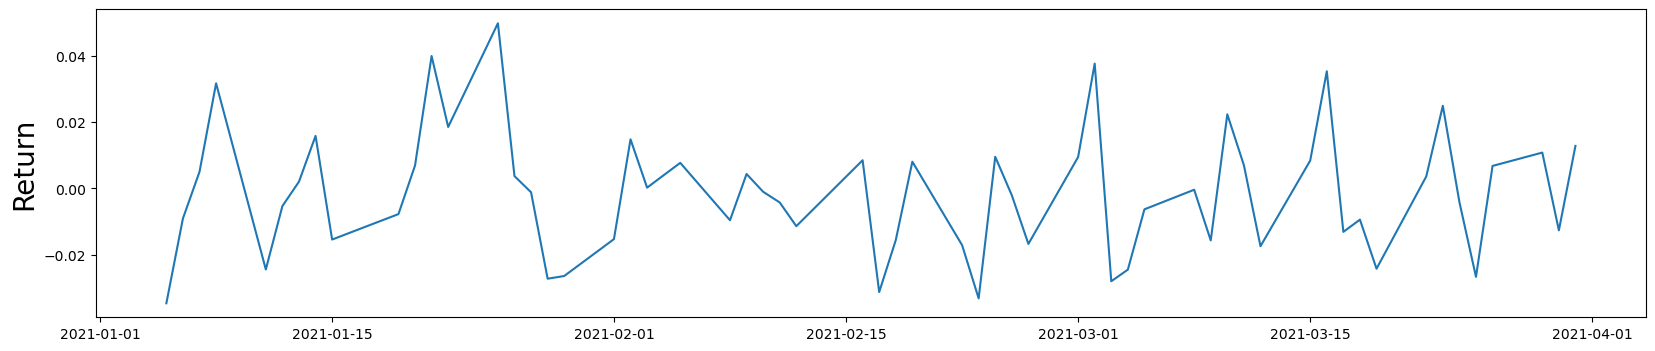

In [10]:
pyplot.figure(figsize=(20, 4))
pyplot.plot(returns_series)
pyplot.ylabel('Return', fontsize=20)

# Check Stationarity
- [ ] How?

# Plot Autocorrelation (ACor) and Partial Autocorrelation (P(ACor))
- ACor states at lag k, how much spread is there between the 1st observation and my kth observation.
- Look for which points fall outside of blue region
- Plots to create
    1. [x] ACor for **open price**. Will NOT achieve accurate results because stationarity does NOT exists. ARIMA models can be applied to nonstationarity time series data.
    2. [x] PACor for **open price**. Will NOT achieve accurate results because stationarity does NOT exists. ARIMA models can be applied to nonstationarity time series data.
    3. [x] ACor for **return**. Stationarity exists, so will achieve better results compared to using the open price. Use with the `Moving Average, MA(d)` model.
    4. [x] PACor for **return**. Stationarity exists, so will achieve better results compared to using the open price. Use with the `Autoregressive, AR(p)` model.

## Plot 1 ACor for open price
- Below, there seems to be a high ACor, which means there's NOT such a difference between our 1st observation and kth observation
    - [ ] What to do with this? 
    - [ ] Does this mean our model prediction(s) will be off?

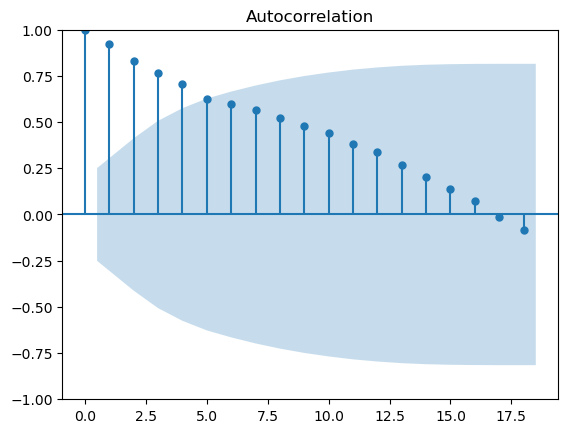

In [11]:
plot_acf(open_voo_df)
pyplot.show()

## Plot 2 PACor for open price
- Below, there seems to be a large fluctuation in our ACor, which means...
    - [ ] What to do with this?
    - [ ] Does this mean our model prediction(s) will be off?

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


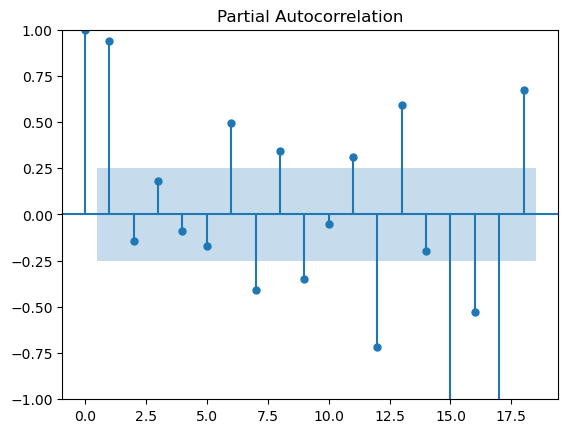

In [12]:
plot_pacf(open_voo_df)
pyplot.show()

## Plot 3 ACor for returns
- Below, there seems to be a minor fluctuation in our ACor. We look at the point that falls outside of the blue region. We see the first one is at 5. Why is this? 
    - [ ] Could it be that the market is closed on the weekends, so we get data strong data for those 5 days?
    - [ ] What to do with this? Use 5 as our d in `MA(d)` $ \rightarrow $ `MA(5)`
    - [ ] Does this mean our model prediction(s) will be off? Can try multiple `MA(d)` options
    - [ ] This data's fequency is daily. How would our plot and model differ if given another frequency (ie: yearly, quarterly, hourly) of data? 

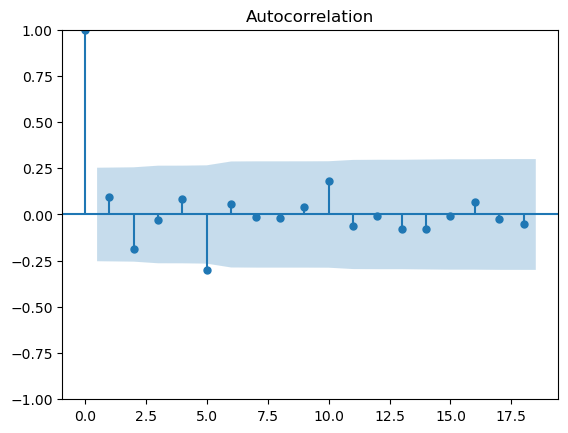

In [13]:
plot_acf(returns_series)
pyplot.show()

## Plot 4 ACor for returns
- Below, there seems to be a minor fluctuation in our APCor. We look at the point that falls outside of the blue region. We see the first one is at 5. Why is this?
    - [ ] Could it be that the market is closed on the weekends, so we get data strong data for those 5 days?
    - [ ] What to do with this? Use 5 as our p in `AR(p)` $ \rightarrow $ `AR(5)`
    - [ ] Does this mean our model prediction(s) will be off? Can try multiple `AR(p)` options
    - [ ] This data's fequency is daily. How would our plot and model differ if given another frequency (ie: yearly, quarterly, hourly) of data?

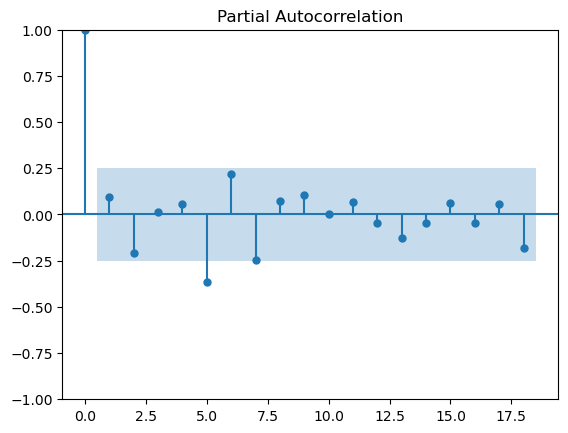

In [14]:
plot_pacf(returns_series)
pyplot.show()

# Split Data

In [15]:
N = len(returns_series)
N

60

In [16]:
split_data_at_length = N - 100
split_data_at_length

-40

In [17]:
train_data = returns_series[0:split_data_at_length]
train_data

Date
2021-01-05   -0.034676
2021-01-06   -0.009077
2021-01-07    0.005011
2021-01-08    0.031708
2021-01-11   -0.024466
2021-01-12   -0.005341
2021-01-13    0.002023
2021-01-14    0.015843
2021-01-15   -0.015443
2021-01-19   -0.007765
2021-01-20    0.006887
2021-01-21    0.039950
2021-01-22    0.018535
2021-01-25    0.049824
2021-01-26    0.003704
2021-01-27   -0.001184
2021-01-28   -0.027261
2021-01-29   -0.026448
2021-02-01   -0.015313
2021-02-02    0.014804
Name: Open, dtype: float64

In [18]:
train_data = train_data.values
train_data

array([-0.03467649, -0.00907749,  0.00501096,  0.03170764, -0.02446568,
       -0.00534099,  0.0020233 ,  0.0158435 , -0.01544346, -0.00776518,
        0.00688688,  0.03995025,  0.01853509,  0.04982396,  0.00370447,
       -0.00118394, -0.02726061, -0.02644784, -0.01531327,  0.01480371])

In [19]:
test_data = returns_series[split_data_at_length:]
test_data

Date
2021-02-03    0.000221
2021-02-04    0.003978
2021-02-05    0.007704
2021-02-08   -0.009611
2021-02-09    0.004337
2021-02-10   -0.001025
2021-02-11   -0.004250
2021-02-12   -0.011405
2021-02-16    0.008485
2021-02-17   -0.031294
2021-02-18   -0.015619
2021-02-19    0.008050
2021-02-22   -0.017122
2021-02-23   -0.033200
2021-02-24    0.009535
2021-02-25   -0.002081
2021-02-26   -0.016763
2021-03-01    0.009462
2021-03-02    0.037657
2021-03-03   -0.028035
2021-03-04   -0.024517
2021-03-05   -0.006324
2021-03-08   -0.000413
2021-03-09   -0.015712
2021-03-10    0.022347
2021-03-11    0.006985
2021-03-12   -0.017464
2021-03-15    0.008389
2021-03-16    0.035335
2021-03-17   -0.013126
2021-03-18   -0.009432
2021-03-19   -0.024251
2021-03-22    0.003586
2021-03-23    0.024931
2021-03-24   -0.004135
2021-03-25   -0.026706
2021-03-26    0.006776
2021-03-29    0.010802
2021-03-30   -0.012659
2021-03-31    0.012822
Name: Open, dtype: float64

In [20]:
test_data = test_data.values
test_data

array([ 0.00022102,  0.00397767,  0.00770362, -0.00961054,  0.00433725,
       -0.00102474, -0.00424972, -0.01140536,  0.00848529, -0.03129386,
       -0.01561907,  0.0080496 , -0.01712232, -0.03320047,  0.00953459,
       -0.00208102, -0.01676294,  0.00946247,  0.0376566 , -0.02803525,
       -0.02451725, -0.00632441, -0.00041332, -0.01571158,  0.02234734,
        0.00698495, -0.01746368,  0.00838872,  0.03533476, -0.01312644,
       -0.00943173, -0.02425127,  0.00358632,  0.02493144, -0.00413526,
       -0.02670574,  0.00677595,  0.01080185, -0.01265928,  0.01282159])

# Create AR Model
- [x] How to determine the proper lag value? Look at the Partial ACor plot. Being that no correlation exists after 5, we'll stop at 5 (where there still exists some correlation)
- [ ] How to understand the model summary?

In [21]:
def ar_models(train_data, lag):
    ar_model = AutoReg(train_data, lags=lag)
    train_ar_model = ar_model.fit()
    train_ar_model.summary()
    
    return train_ar_model

In [22]:
trained_ar_models = []
test_lags = [1, 5, 7]

for test_lags_idx in range(len(test_lags)):
    test_lag = test_lags[test_lags_idx]
    print(test_lags_idx, "with lag of", test_lag)
    
    trained_ar_model = ar_models(train_data, test_lag)
    trained_ar_models.append(trained_ar_model)

0 with lag of 1
1 with lag of 5
2 with lag of 7


In [23]:
trained_ar_models

# Make Predictions
- Start making predictions at the split observation and go to the n-1 observation. A simplier example is with [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. Say we split at 7. historical_data would start at 7. We will make predictions for 8, 9. What about 10?

In [24]:
historical_data = len(train_data)
historical_data

20

In [25]:
tomorrow = len(open_voo_df) - 1
tomorrow

60

In [26]:
predictions = []
for trained_ar_models_idx in range(len(trained_ar_models)):
    trained_ar_model = trained_ar_models[trained_ar_models_idx]
    print(trained_ar_models_idx, trained_ar_model)
    
    model_prediction = trained_ar_model.predict(start=historical_data, end=tomorrow, dynamic=False)
    predictions.append(model_prediction)

0 <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x13ea9fa60>
1 <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x13eebab20>
2 <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x13eee7580>


In [27]:
predictions

[array([0.00692734, 0.00475935, 0.00416261, 0.00399835, 0.00395314,
        0.0039407 , 0.00393727, 0.00393633, 0.00393607, 0.003936  ,
        0.00393598, 0.00393597, 0.00393597, 0.00393597, 0.00393597,
        0.00393597, 0.00393597, 0.00393597, 0.00393597, 0.00393597,
        0.00393597, 0.00393597, 0.00393597, 0.00393597, 0.00393597,
        0.00393597, 0.00393597, 0.00393597, 0.00393597, 0.00393597,
        0.00393597, 0.00393597, 0.00393597, 0.00393597, 0.00393597,
        0.00393597, 0.00393597, 0.00393597, 0.00393597, 0.00393597,
        0.00393597]),
 array([ 0.02809425,  0.03852146,  0.02930043,  0.01470178, -0.00934632,
        -0.02148375, -0.02410657, -0.0101604 ,  0.00771112,  0.026756  ,
         0.03380235,  0.02962343,  0.01306789, -0.00501316, -0.01893178,
        -0.02029408, -0.01069059,  0.00693665,  0.0229068 ,  0.03125114,
         0.02727002,  0.01403651, -0.00304002, -0.01537792, -0.01810765,
        -0.00967582,  0.00533257,  0.02034348,  0.02817121,  0.025744

0 NEW MODEL
0.00032476638297661606
0.0371364434187584
0.014349389647292507
2.0791475537966835


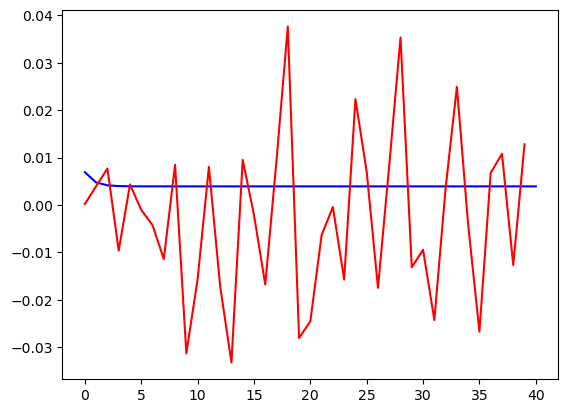

1 NEW MODEL
0.0007466656593079331
0.059286386033934185
0.022444617010385522
5.826857126741961


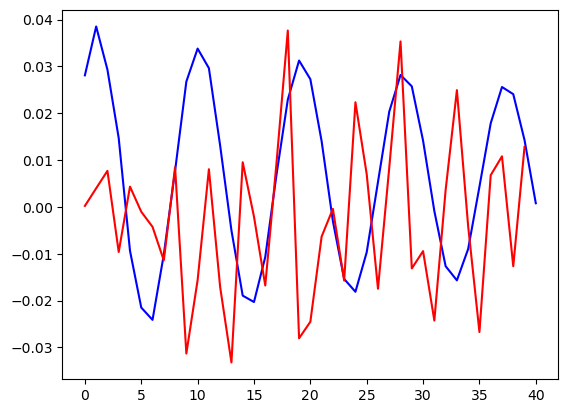

2 NEW MODEL
0.003175887421079775
0.12390326883753608
0.04681953628675386
10.112094795523362


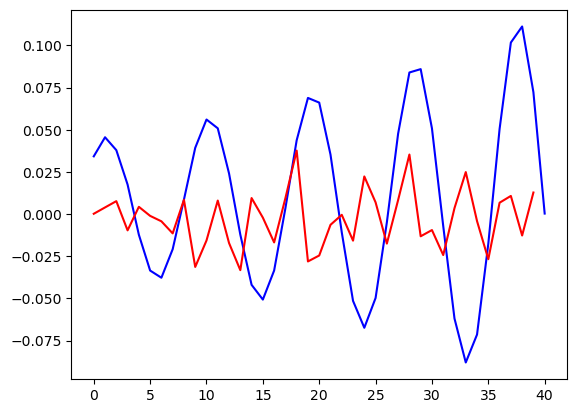

In [28]:
for predictions_idx in range(len(predictions)):
    prediction = predictions[predictions_idx]
    print("===========")
    print(predictions_idx, "NEW MODEL")
 
    # pyplot.plot(prediction, color='blue')
    # pyplot.show()
    # pyplot.plot(test_data, color='red')
    # pyplot.show()
    # print(prediction[:-1])
    
    mse = mean_squared_error(test_data, prediction[:-1])
    print(mse)
    
    print(max_error(test_data, prediction[:-1]))
    print(mean_absolute_error(test_data, prediction[:-1]))
    print(mean_absolute_percentage_error(test_data, prediction[:-1]))
    
    pyplot.plot(prediction, color='blue')
    pyplot.plot(test_data, color='red')
    pyplot.show()